In [91]:
import pandas as pd

# Read the data
openpl = pd.read_csv('openpowerlifting.csv', dtype=object, low_memory=False)

# Define the columns to be removed
columns_to_remove = [
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg' ]

# Remove the specified columns
openpl.drop(columns=columns_to_remove, inplace=True)

# Filter rows based on specified criteria for USPA and USAPL
uspa_criteria = ((openpl['Federation'] == 'USPA') & 
                 (openpl['Country'] == 'USA') & 
                 (openpl['State'] == 'IL') & 
                 (openpl['Event'] == 'SBD') & 
                 (openpl['Equipment'] == 'Raw') & 
                 (openpl['Division'] == 'Open') &      
                 (~openpl['Place'].isin(['DQ', 'DD'])))

usapl_criteria = ((openpl['Federation'] == 'USAPL') & 
                  (openpl['Country'] == 'USA') & 
                  (openpl['State'] == 'IL') & 
                  (openpl['Event'] == 'SBD') & 
                  (openpl['Equipment'] == 'Raw') & 
                  ((openpl['Division'] == 'FR-O') | (openpl['Division'] == 'MR-O')) &      
                  (~openpl['Place'].isin(['DQ', 'DD'])))

# Apply the filters and concatenate the tables
merged_table = pd.concat([openpl.loc[uspa_criteria], openpl.loc[usapl_criteria]])

# Convert selected columns to float data type
columns_to_convert = ['Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
                      'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']
merged_table[columns_to_convert] = merged_table[columns_to_convert].astype(float)

# Convert 'Place' column to integer
merged_table['Place'] = merged_table['Place'].astype(int)

# Adjust display settings to show all columns
#pd.set_option('display.max_columns', None)


# Replace NaN values with '' for object columns
object_columns = merged_table.select_dtypes(include='object').columns
merged_table[object_columns] = merged_table[object_columns].fillna('')

# Replace NaN values with 0 for integer and float columns
numerical_columns = merged_table.select_dtypes(include=['int', 'float']).columns
merged_table[numerical_columns] = merged_table[numerical_columns].fillna(0)



merged_table['Date'] = pd.to_datetime(merged_table['Date'])
# Display the first 40 rows of the DataFrame

# Export the merged DataFrame as a new CSV file
#merged_table.to_csv('merged_data_v1.csv', index=False)
#merged_table.head()



Name                        object
Sex                         object
Event                       object
Equipment                   object
Age                        float64
AgeClass                    object
BirthYearClass              object
Division                    object
BodyweightKg               float64
WeightClassKg               object
Best3SquatKg               float64
Best3BenchKg               float64
Best3DeadliftKg            float64
TotalKg                    float64
Place                        int32
Dots                       float64
Wilks                      float64
Glossbrenner               float64
Goodlift                   float64
Tested                      object
Country                     object
State                       object
Federation                  object
ParentFederation            object
Date                datetime64[ns]
MeetCountry                 object
MeetState                   object
MeetTown                    object
MeetName            

In [53]:
merged_table.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
335584,Abby Citrin,F,SBD,Raw,28.5,24-34,24-39,FR-O,62.0,63,150.0,80.0,180.0,410.0,1,445.30,445.71,393.65,90.64,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes
335585,Sarah Cupp,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.4,72,147.5,92.5,152.5,392.5,1,409.10,405.38,357.70,83.13,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes
335589,Stephanie Vasquez,F,SBD,Raw,35.5,35-39,24-39,FR-O,103.2,84+,132.5,75.0,152.5,360.0,2,303.54,297.13,254.21,63.68,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes
335604,Jacob Pezzuto,M,SBD,Raw,25.5,24-34,24-39,MR-O,82.2,83,192.5,117.5,240.0,550.0,2,373.34,369.26,355.36,76.51,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes
335606,Eddie Cupp,M,SBD,Raw,36.5,35-39,24-39,MR-O,74.6,83,157.5,107.5,152.5,417.5,4,300.55,298.61,288.59,61.04,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes


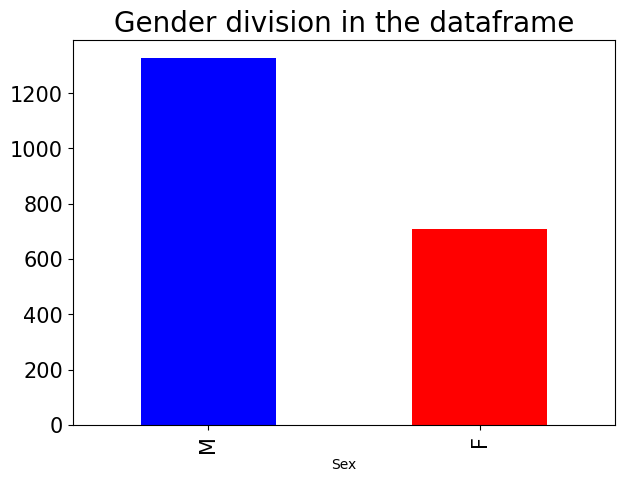

Percentage of Male lifters: 65%

Percentage of Female lifters: 35%

Sex
M    1326
F     710
Name: count, dtype: int64


In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
colors = ['blue', 'red']
merged_table['Sex'].value_counts().plot(kind='bar', color=colors)
plt.title('Gender division in the dataframe',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(merged_table[merged_table['Sex']=='M'])/len(merged_table)*100),4))
print('Percentage of Female lifters: {}%\n'.format(round(len(merged_table[merged_table['Sex']=='F'])/len(merged_table)*100),4))
print(merged_table['Sex'].value_counts())

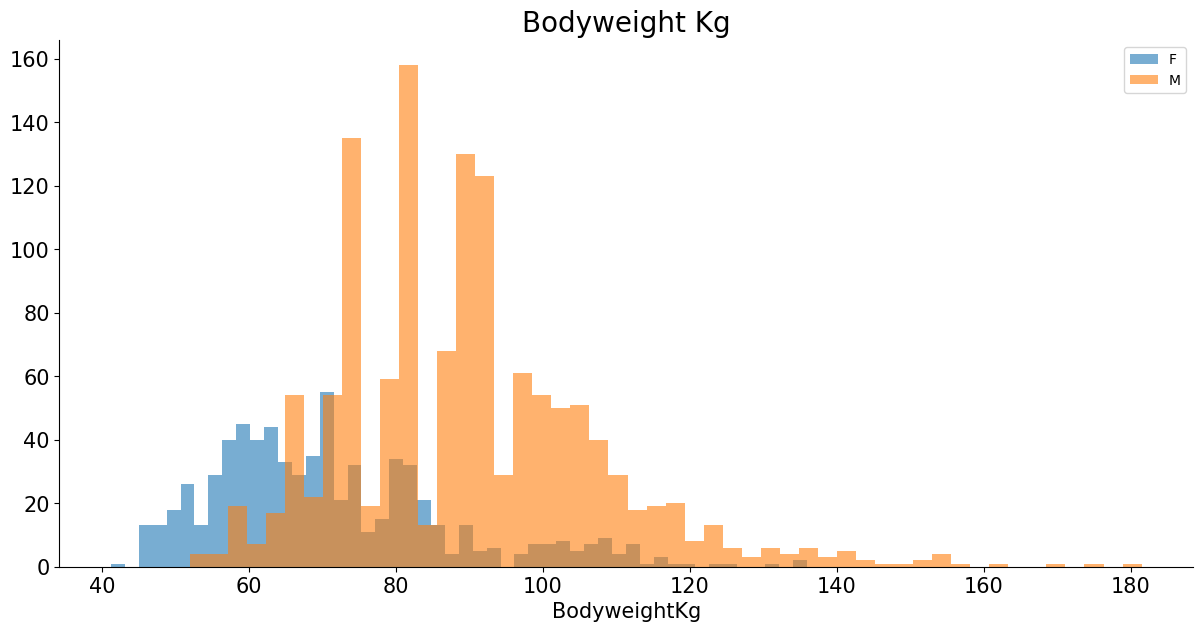

In [55]:
import seaborn as sns
g = sns.FacetGrid(merged_table,hue='Sex',height=6,aspect=2,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

In [99]:
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Create a dictionary to map age classes to numeric values
ageclass_mapping = {'13-15': 1, '16-17': 2, '18-19': 3, '20-23': 4, '24-34': 5, '35-39': 6, '40-44': 7, '45-49': 8,  '50-54': 9, '55-59': 10, '65-69': 11}

# Map age classes to numeric values
merged_table['AgeClass_Numeric'] = merged_table['AgeClass'].map(ageclass_mapping)

# Print the DataFrame to verify the changes
#print(merged_table[['AgeClass', 'AgeClass_Numeric']])
#print(merged_table['AgeClass'].unique())
merged_table.head()



,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,AgeClass_Numeric
335584,Abby Citrin,F,SBD,Raw,28.5,24-34,24-39,FR-O,62.0,63,150.0,80.0,180.0,410.0,1,445.30,445.71,393.65,90.64,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,5.0
335585,Sarah Cupp,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.4,72,147.5,92.5,152.5,392.5,1,409.10,405.38,357.70,83.13,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,6.0
335589,Stephanie Vasquez,F,SBD,Raw,35.5,35-39,24-39,FR-O,103.2,84+,132.5,75.0,152.5,360.0,2,303.54,297.13,254.21,63.68,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,6.0
335604,Jacob Pezzuto,M,SBD,Raw,25.5,24-34,24-39,MR-O,82.2,83,192.5,117.5,240.0,550.0,2,373.34,369.26,355.36,76.51,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,5.0
335606,Eddie Cupp,M,SBD,Raw,36.5,35-39,24-39,MR-O,74.6,83,157.5,107.5,152.5,417.5,4,300.55,298.61,288.59,61.04,Yes,USA,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,6.0


In [105]:
import matplotlib.pyplot as plt

# Define a function to round numbers to one decimal place
def round_to_one_decimal(x):
    return round(x, 1)

# Group by 'AgeClass_Numeric' and 'AgeClass' and calculate mean and mode for each column
mean_mode_stats = merged_table.groupby(['AgeClass_Numeric', 'AgeClass']).agg({
    'Best3SquatKg': ['mean', lambda x: x.mode().iloc[0]],
    'Best3BenchKg': ['mean', lambda x: x.mode().iloc[0]],
    'Best3DeadliftKg': ['mean', lambda x: x.mode().iloc[0]]
})

# Rename columns for clarity
mean_mode_stats.columns = ['Squat_mean', 'Squat_mode', 'Bench_mean', 'Bench_mode', 'Deadlift_mean', 'Deadlift_mode']

# Apply rounding to one decimal place
mean_mode_stats = mean_mode_stats.apply(round_to_one_decimal)

# Reset the index to include 'AgeClass_Numeric' as a regular column
mean_mode_stats.reset_index(inplace=True)

# Set 'AgeClass_Numeric' as the index
mean_mode_stats.set_index('AgeClass_Numeric', inplace=True)

# Display the DataFrame
print(mean_mode_stats)



                 AgeClass  Squat_mean  Squat_mode  Bench_mean  Bench_mode  \
AgeClass_Numeric                                                            
1.0                 13-15       137.0        87.5        78.5        57.5   
2.0                 16-17       156.6       125.0        94.3        75.0   
3.0                 18-19       168.8       195.0       102.1       112.5   
4.0                 20-23       186.3       215.0       115.9       110.0   
5.0                 24-34       174.5       227.5       109.6       130.0   
6.0                 35-39       166.4       115.0       105.4        52.5   
7.0                 40-44       153.2        87.5       100.7        60.0   
8.0                 45-49       160.7        95.0       111.9       147.5   
9.0                 50-54       141.3        80.0        93.3        50.0   
10.0                55-59       108.3        72.5        72.0        40.0   
11.0                65-69        52.5        52.5        45.0        45.0   

In [104]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot bar charts for each lift mean value
plt.bar(mean_stats_by_ageclass.index, mean_stats_by_ageclass['Squat_mean'], label='Squat Mean', alpha=0.6)
plt.bar(mean_stats_by_ageclass.index, mean_stats_by_ageclass['Bench_mean'], label='Bench Mean', alpha=0.6)
plt.bar(mean_stats_by_ageclass.index, mean_stats_by_ageclass['Deadlift_mean'], label='Deadlift Mean', alpha=0.6)

# Adding labels and title
plt.title('Mean Lift Statistics by Age Class', fontsize=20)
plt.xlabel('Age Class', fontsize=15)
plt.ylabel('Mean', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

NameError: name 'mean_stats_by_ageclass' is not defined

<Figure size 1200x800 with 0 Axes>